In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import tensorflow as tf
import keras

from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, Callback
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU,GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, Cropping2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.utils import np_utils

import time, cv2, glob

global inputShape,size

Preprocessing

In [5]:
size = 100

In [6]:
potholeTrainImages = glob.glob("/content/drive/MyDrive/Pothole/train/Pothole/*.jpg")
potholeTrainImages.extend(glob.glob("/content/drive/MyDrive/Pothole/train/Pothole/*.jpeg"))
potholeTrainImages.extend(glob.glob("/content/drive/MyDrive/Pothole/train/Pothole/*.png"))
train1 = [cv2.resize(cv2.imread(img,0),(size,size)) for img in potholeTrainImages]
nonPotholeTrainImages = glob.glob("/content/drive/MyDrive/Pothole/train/Plain/*.jpg")
train2 = [cv2.resize(cv2.imread(img,0),(size,size)) for img in nonPotholeTrainImages]
train1 = np.asarray(train1)
train2 = np.asarray(train2)

In [7]:
nonPotholeTestImages = glob.glob("/content/drive/MyDrive/Pothole/test/Plain/*.jpg")
test2 = [cv2.resize(cv2.imread(img,0),(size,size)) for img in nonPotholeTestImages]
test2 = np.asarray(test2)

potholeTestImages = glob.glob("/content/drive/MyDrive/Pothole/test/Pothole/*.jpg")
test1 = [cv2.resize(cv2.imread(img,0),(size,size)) for img in potholeTestImages]
test1 = np.asarray(test1)

In [8]:
X_train = []
X_train.extend(train1)
X_train.extend(train2)
X_test = []
X_test.extend(test1)
X_test.extend(test2)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [9]:
y_train1 = np.ones([train1.shape[0]],dtype = int)
y_train2 = np.zeros([train2.shape[0]],dtype = int)
y_test1 = np.ones([test1.shape[0]],dtype = int)
y_test2 = np.zeros([test2.shape[0]],dtype = int)
y_train = []
y_train.extend(y_train1)
y_train.extend(y_train2)
y_train = np.asarray(y_train)

y_test = []
y_test.extend(y_test1)
y_test.extend(y_test2)
y_test = np.asarray(y_test)

In [10]:
print("train shape X", X_train.shape)
print("train shape y", y_train.shape)

train shape X (696, 100, 100)
train shape y (696,)


In [11]:
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)

X_train = X_train.reshape(X_train.shape[0], size, size, 1)
X_test = X_test.reshape(X_test.shape[0], size, size, 1)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
inputShape = (size, size, 1)

Model

In [13]:
model = Sequential()
model.add(Conv2D(16, (8, 8), strides=(4, 4), padding='valid', input_shape=(size,size,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5), padding="same"))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(512))
model.add(Dropout(.1))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

Training

In [14]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_train, y_train, epochs=150,validation_split=0.1)

metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))


Epoch 1/150
20/20 [==============================] - 19s 105ms/step - loss: 0.9092 - accuracy: 0.5460 - val_loss: 0.6687 - val_accuracy: 0.6143
Epoch 2/150
20/20 [==============================] - 1s 70ms/step - loss: 0.6864 - accuracy: 0.5428 - val_loss: 0.6371 - val_accuracy: 0.6571
Epoch 3/150
20/20 [==============================] - 1s 71ms/step - loss: 0.6544 - accuracy: 0.6142 - val_loss: 0.6340 - val_accuracy: 0.6857
Epoch 4/150
20/20 [==============================] - 1s 70ms/step - loss: 0.6318 - accuracy: 0.6465 - val_loss: 0.6085 - val_accuracy: 0.6571
Epoch 5/150
20/20 [==============================] - 1s 70ms/step - loss: 0.6665 - accuracy: 0.5512 - val_loss: 0.7167 - val_accuracy: 0.6000
Epoch 6/150
20/20 [==============================] - 1s 69ms/step - loss: 0.6275 - accuracy: 0.6600 - val_loss: 0.6902 - val_accuracy: 0.5429
Epoch 7/150
20/20 [==============================] - 1s 70ms/step - loss: 0.5827 - accuracy: 0.7062 - val_loss: 0.5995 - val_accuracy: 0.6286
Epoc

Predictions

In [15]:
pred = model.predict(X_test)

In [16]:
labels = []
for i in range(len(pred)):
  if pred[i][1]>=pred[i][0]:
    labels.append(1)
  else:
    labels.append(0)

In [40]:
y_test[5]

array([0., 1.], dtype=float32)

In [39]:
pred[5]

array([1.3043058e-07, 9.9999988e-01], dtype=float32)

In [38]:
labels[5]

1

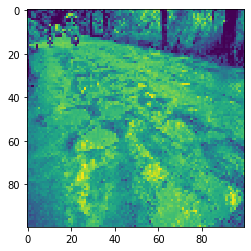

In [37]:
plt.imshow(X_test[5].reshape(size, size), interpolation='nearest')

Saving the Model

In [ ]:
model.save('/content/drive/MyDrive/Pothole/pothole.model')

converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Pothole/pothole.model')
tflite_model = converter.convert()